In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Para ajustar datos

In [35]:
def cargar_datos(path, file):
    data = np.loadtxt(path+file, delimiter=",")
    n_medicion, desplazamiento_fourier = data[:, 0], data[:, 1]
    return n_medicion, desplazamiento_fourier


In [36]:
path = ""
filename = "1GAP_100um_analisis_desplazamiento.dat"

x, y = cargar_datos(path="", file=filename)
# Cambiando a mm
x /= 1000

delta_x = x - x[0] 

delta_y = y - y[0]

# x contiene el desplazamiento de la monturaa en um
# y contiene la posicion del maximo en el espacio de fourier


In [37]:
# Realizando ajuste

# Definicion del modelo a ajustar
def f(x, a, b):
    y = a*x+b
    return y


# Estimaciones iniciales de los parametros del modelo
p0 = [0.9, 0]
# Ajustando
pars, cov = curve_fit(
    f=f, xdata=delta_x[:], ydata=delta_y[:], p0=p0, bounds=(-np.inf, np.inf))

# Separando parametros
a, b = pars[:]

# Definiendo dominio de la funcion ajustada
x_fit = np.arange(0, 2, 0.1)
# Evaluando funcion ajustada
y_fit = f(x_fit, a, b)

# Calculando R-square
ss_res = np.sum((delta_y-f(delta_x,a,b))**2)
ss_tot = np.sum((delta_y-delta_y.mean())**2)
r_square= 1-ss_res/ss_tot
print(r_square)


0.9999871737584574


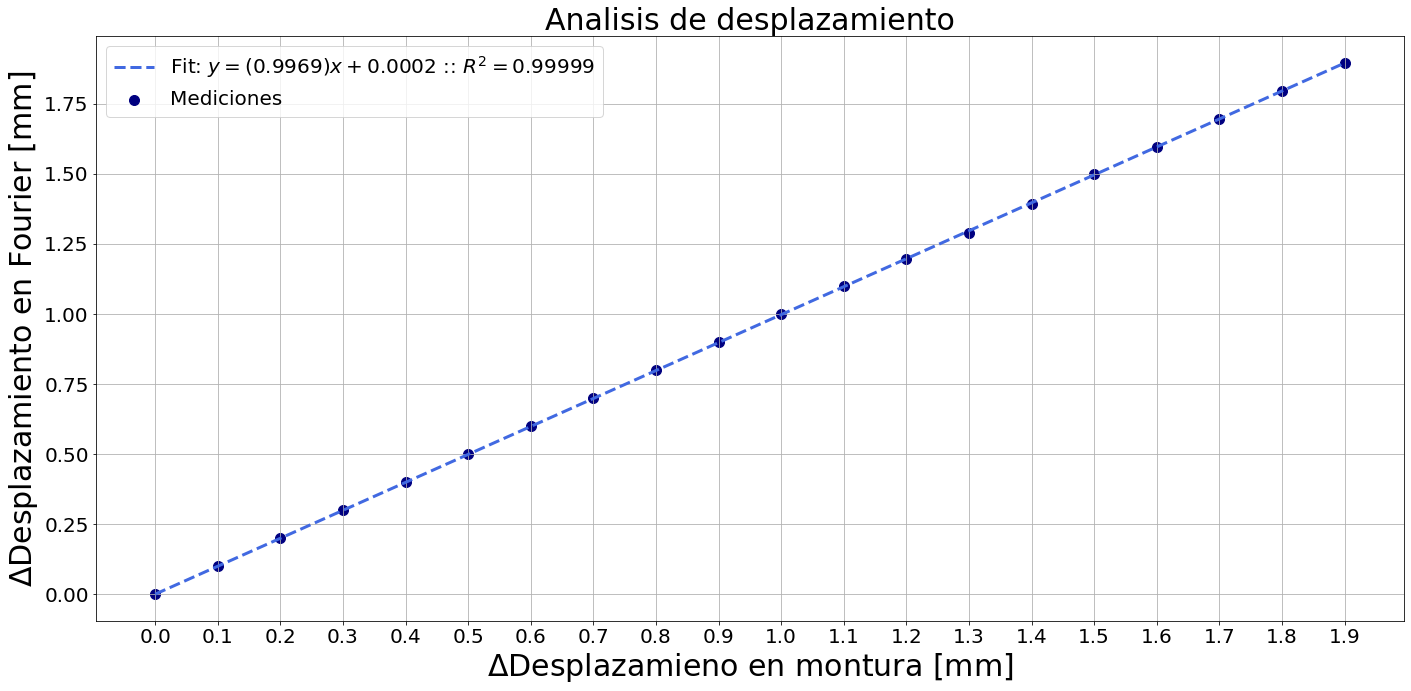

In [40]:

"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Analisis de desplazamiento", fontsize=30)


graph_data = ax.scatter(delta_x[:], delta_y[:], s=400, marker=".", c="navy", label="Mediciones")

# Decidiendo label fit:
if(b<0):
    label_fit = r"Fit: $y = (%.4f)x %.4f$ :: $R^{2}= %.5f$" % (a,b,r_square)
else:
    label_fit = r"Fit: $y = (%.4f)x + %.4f$ :: $R^{2}= %.5f$" % (a,b,r_square)   

graph_fit = ax.plot(x_fit, y_fit, c="royalblue", linestyle="dashed",
linewidth=3, label=label_fit)

ax.set_xlabel(r"$\Delta$Desplazamieno en montura [mm]", fontsize=30)
ax.set_ylabel("$\Delta$Desplazamiento en Fourier [mm]", fontsize=30)
ax.grid()
ax.set_xticks(np.arange(0, 2, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=20)
#plt.savefig(path + filename[0:-4]+".png")
plt.savefig(path + "seguimiento_envolventes_normalizada_100um.png")
plt.show()


# Calculando el promedio y la desviacion estandar 

In [38]:
desplazamiento_prom = np.mean(y-y[0])
desplazamiento_std = np.std(y-y[0], ddof=1)
print("L = %.4f \nE_l = %.4f" % (desplazamiento_prom, desplazamiento_std))


L = 0.4642 
E_l = 0.2940


In [24]:
print(y[5]-y[4])

0.047000000000000014
